## Steps to Compute Principal Components from Scratch


1. Standardize each column
2. Compute Covariance Matrix
3. Compute Eigen values and Eigen Vectors
4. Derive Principal Component Features by taking dot product of eigen vector and standardized columns

**Eigen Value**

* The term eigenvalue can be termed as characteristic value, characteristic root, proper values or latent roots as well.

* In simple words, the eigenvalue is a scalar that is used to transform the eigenvector

                            Basic Equation is Ax = λx

* The number or scalar value “λ” is an eigenvalue of A.

* In Mathematics, an eigen vector corresponds to the real non zero eigenvalues which point in the direction stretched by the transformation whereas eigen value is considered as a factor by which it is stretched.

* In case, if the eigen value is negative, the direction of the transformation is negative.

* Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude. For example, a negative eigenvalue may reverse the direction of the eigenvector as part of scaling it.

**Eigen Vectors**

* Eigenvectors are the vectors(non-zero) that do not change the direction when any linear transformation is applied.
* Eigen Vector changes by only a scalar factor (also known as Eigen Value)
* Let us say A is an “n × n” matrix and λ is an eigenvalue of matrix A, then x, a non-zero vector, is called as eigenvector if it satisfies the given below expression;

                       Basic Equation is Ax = λx where x is an eigenvector of A corresponding to eigenvalue, λ.

**Why use Eigenvalues & Eigenvectors**
* In simple words, the concept of Eigenvectors and Eigenvalues are used to determine a set of important variables (in form of vector) along with scale along different dimensions (key dimensions based on variance) for analysing the data in a better manner.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:

# Let's take an Example
X = np.array([1,2,3,4,5])
Y = np.array([123,142,163,174,195])
Z = np.array([531,522,573,514,595])
data = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
print("Shape of Data:", data.shape)
print(data)


Shape of Data: (5, 3)
   X    Y    Z
0  1  123  531
1  2  142  522
2  3  163  573
3  4  174  514
4  5  195  595


In [3]:
# Manual Steps
print("\nStep 1. Calculate Mean of Each Column")
Mean_X = data["X"].mean()
print("Mean of X :",Mean_X)
Mean_Y = data["Y"].mean()
print("Mean of Y :",Mean_Y)
Mean_Z = data["Z"].mean()
print("Mean of Z :",Mean_Z)


Step 1. Calculate Mean of Each Column
Mean of X : 3.0
Mean of Y : 159.4
Mean of Z : 547.0


In [7]:
print("\nStep 2. Calculate Variance")
# Variance = sum(((x(i) - mean(x))^2))/n-1
# Var(X) = [ (1-3.0)^2 + (2-3.0)^2 + (3-3.0)^2 + (4-3.0)^2 +(5-3.0)^2 ] / (5-1) = (4.0 + 1.0 + 0.0 + 1.0 + 4.0) / 4 = 10.0 / 4 = 2.5
print(data.var())


Step 2. Calculate Variance
X       2.5
Y     780.3
Z    1237.5
dtype: float64


In [8]:
print("\nStep 3. Covariance Matrix :",data.cov().shape)
# Covariance (XY) = (sum|X(i)-mean(X) * Y(i)-mean(Y)|) / (n-1)
# Covar(XY) = [(1–3.0)*(123-159.4) + (2–3.0)*(142-159.4) + (3-3.0)*(163-159.4) + (4-3.0)*(174-159.4) + (5-3.0)*(195-159.4)] / (5-1) 
# = [2.0*36.4 + 1.0*17.4 + 0.0 + 1.0*14.5 + 2.0*35.5] / 4 
# = 175.7 / 4 = 43.92 ~ 44
# Covar(XY) = 44
# If you examine the calculations carefully, you’ll see the pattern to compute the covariance of the XZ and YZ columns. 
# And you’ll see that Covar(XY) = Covar(YX).
print(data.cov())


Step 3. Covariance Matrix : (3, 3)
      X      Y       Z
X   2.5   44.0    30.0
Y  44.0  780.3   584.5
Z  30.0  584.5  1237.5


In [9]:
print("\nStep 4. Eigenvalues and Eigenvectors for the calculated Covariance matrix.")
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(data.cov())
print("Eigen Values of Covariance Matrix :",eigen_values)
print("Eigen Vectors of Covariance Matrix :")
print(eigen_vectors)


Step 4. Eigenvalues and Eigenvectors for the calculated Covariance matrix.
Eigen Values of Covariance Matrix : [7.92511994e-03 3.82275407e+02 1.63801667e+03]
Eigen Vectors of Covariance Matrix :
[[ 0.99824773  0.05082148  0.03030913]
 [-0.05905775  0.82370297  0.56393759]
 [ 0.00369442 -0.56473941  0.82526102]]


In [10]:
print("\nStep 5. Sort Eigenvalues in descending order")
# Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.
# Remember each column in the Eigen vector-matrix corresponds to a principal component,
# So arranging them in descending order of their Eigenvalue 
# will automatically arrange the principal component in descending order of their variability.
# Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print("Sorting Index based on Eigen Value :",sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
print("Sorting Eigen Value :",sorted_eigenvalue)
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print("Sorted Eigen Vectors :")
print(sorted_eigenvectors)


Step 5. Sort Eigenvalues in descending order
Sorting Index based on Eigen Value : [2 1 0]
Sorting Eigen Value : [1.63801667e+03 3.82275407e+02 7.92511994e-03]
Sorted Eigen Vectors :
[[ 0.03030913  0.05082148  0.99824773]
 [ 0.56393759  0.82370297 -0.05905775]
 [ 0.82526102 -0.56473941  0.00369442]]


In [11]:
print("\nStep 6. Select a subset from the rearranged Eigenvalue matrix")
# Select a subset from the rearranged Eigenvalue matrix as per our need i.e. number_comp = 2. 
# This means we selected the first two principal components.
# select the first n eigenvectors, n is desired dimension of our final reduced data.
n_components = 2 #you can select any number of components.
print("Number of Principal Components :",n_components)
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print("Filter Eigen Vector Subset :")
print(eigenvector_subset)
# n_components = 2 means our final data should be reduced to just 2 variables. 
# if we change it to 3 then we get our data reduced to 3 variables.


Step 6. Select a subset from the rearranged Eigenvalue matrix
Number of Principal Components : 2
Filter Eigen Vector Subset :
[[ 0.03030913  0.05082148]
 [ 0.56393759  0.82370297]
 [ 0.82526102 -0.56473941]]


In [12]:
print("\nStep 7. Transform the data : Mean Centering the data  ")
# Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset 
# and the Transpose of the mean-centered data. 
# By transposing the outcome of the dot product, 
# the result we get is the data reduced to lower dimensions from higher dimensions.

X_mean = data - data.mean()
print("i. Input Data :")
print(data)
print("\nii. Mean of Each Column")
print(data.mean())
print("\niii. Mean(Data) = Mean(column) - Column_Value")
print(X_mean)
print("In above dataframe, I’ve subtracted the mean of each column from each cell of respective column itself.")
print("So the mean of each column now is zero.")


Step 7. Transform the data : Mean Centering the data  
i. Input Data :
   X    Y    Z
0  1  123  531
1  2  142  522
2  3  163  573
3  4  174  514
4  5  195  595

ii. Mean of Each Column
X      3.0
Y    159.4
Z    547.0
dtype: float64

iii. Mean(Data) = Mean(column) - Column_Value
     X     Y     Z
0 -2.0 -36.4 -16.0
1 -1.0 -17.4 -25.0
2  0.0   3.6  26.0
3  1.0  14.6 -33.0
4  2.0  35.6  48.0
In above dataframe, I’ve subtracted the mean of each column from each cell of respective column itself.
So the mean of each column now is zero.


In [13]:
# Compute PC1 for row 1. 
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()
print("\n")
print("PCA of Data = Dot Product of Mean(Data) and Eigen Vector Subset")
print(X_reduced)
print("\nThe final dimensions of Data reduced to (5,2) and originally the data was of higher dimensions (5,3)")



PCA of Data = Dot Product of Mean(Data) and Eigen Vector Subset
[[-33.79212281 -21.04860048]
 [-30.4743487   -0.26476795]
 [ 23.48696187 -11.7178939 ]
 [-18.96981579  30.71328524]
 [ 59.74932542   2.31797709]]

The final dimensions of Data reduced to (5,2) and originally the data was of higher dimensions (5,3)


# PCA using Scikit Learn

In [14]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X=data)

In [16]:

df_pca = pd.DataFrame(df_pca)
print("Original Data Shape :",data.shape)
print(data)
print("\n")
print("PCA Data Shape :",df_pca.shape)
print(df_pca.round(2))
# The first column is the first PC and so on. This dataframe (df_pca) has the same dimensions as the original data X.

Original Data Shape : (5, 3)
   X    Y    Z
0  1  123  531
1  2  142  522
2  3  163  573
3  4  174  514
4  5  195  595


PCA Data Shape : (5, 2)
       0      1
0 -33.79 -21.05
1 -30.47  -0.26
2  23.49 -11.72
3 -18.97  30.71
4  59.75   2.32


In [17]:
# Principal Components Weights (Eigenvectors)
print("\n")
print("Eigen Vectors :")
print(pca.components_)



Eigen Vectors :
[[ 0.03030913  0.56393759  0.82526102]
 [ 0.05082148  0.82370297 -0.56473941]]


### How many components to take ?

In [20]:
pca = PCA()
df_pca = pca.fit_transform(X=data)
# Ratio of Variance explained by each component
# We can now look at the proportion of variance explained by each PC.
var = pca.explained_variance_ratio_
print(var)
print("So variance explained by each component are 0.81, 0.18, 0.000003")

# Inference : 
# From the output we find that PC1 explains 81% of the variance, 
# PC2 explains 18% and so on. 
# We find that the first 2 components explain approximately 90% of the variance 
# (0.81+0.18+0.000003)

[8.10778928e-01 1.89217150e-01 3.92274411e-06]
So variance explained by each component are 0.81, 0.18, 0.000003


###  PCA Chart

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

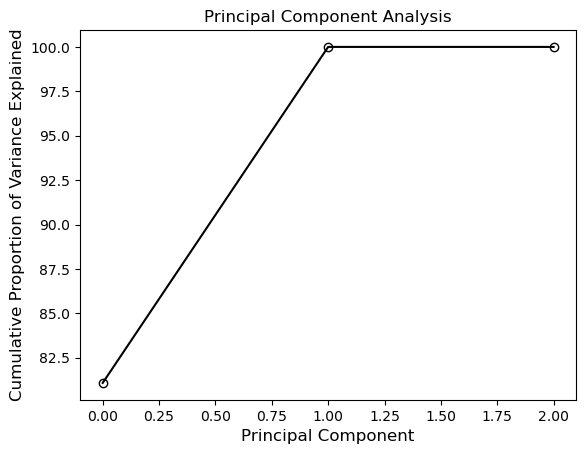

In [22]:
# In the above step, we got the proportion of variance explained by each component 
# which we need to decide the number of components. 
# We calculated that the first seven components explain most of the variance, 
# however, we plot the explained variance on a line graph. 
# Here we plot the ratio of variance explained by each component using a line graph. 
# This PCA chart helps us to decide the number of principal components to be taken for the modeling algorithm.

cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

### How to get the original features back

In [23]:

# The fitted pca object has the inverse_transform() method that gives back the original data when you input principal components features.
print("PCA Dataframe")
print(df_pca.round(2))
df_orig = pca.inverse_transform(df_pca)
print("\n")
print("Original Dataframe :")
print(pd.DataFrame(df_orig).round())

PCA Dataframe
[[-3.379e+01 -2.105e+01 -9.000e-02]
 [-3.047e+01 -2.600e-01  6.000e-02]
 [ 2.349e+01 -1.172e+01  1.200e-01]
 [-1.897e+01  3.071e+01 -1.000e-02]
 [ 5.975e+01  2.320e+00 -7.000e-02]]


Original Dataframe :
     0      1      2
0  1.0  123.0  531.0
1  2.0  142.0  522.0
2  3.0  163.0  573.0
3  4.0  174.0  514.0
4  5.0  195.0  595.0
